In [1]:
import zipfile
import os
# https://github.com/city292/build_assessment/archive/refs/heads/master.zip

In [2]:

!wget --no-check-certificate \
    "https://github.com/city292/build_assessment/archive/refs/heads/master.zip" \
    -O "/tmp/building-data.zip"


zip_ref = zipfile.ZipFile('/tmp/building-data.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

--2023-04-25 19:47:47--  https://github.com/city292/build_assessment/archive/refs/heads/master.zip
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/city292/build_assessment/zip/refs/heads/master [following]
--2023-04-25 19:47:47--  https://codeload.github.com/city292/build_assessment/zip/refs/heads/master
Resolving codeload.github.com (codeload.github.com)... 20.205.243.165
Connecting to codeload.github.com (codeload.github.com)|20.205.243.165|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘/tmp/building-data.zip’

/tmp/building-data.     [   <=>              ] 268.30M  18.7MB/s    in 14s     

2023-04-25 19:48:02 (18.5 MB/s) - ‘/tmp/building-data.zip’ saved [281331192]



In [3]:
print('Test set buildings' , len(os.listdir('/tmp/build_assessment-master/data/train/0')))

Test set buildings 2038


In [4]:
import pandas as pd
import numpy as np
from PIL import Image
import os
path0 = '/tmp/build_assessment-master/data/train/0'
path1 = '/tmp/build_assessment-master/data/train/1'
path2 = '/tmp/build_assessment-master/data/train/2'
path3 = '/tmp/build_assessment-master/data/train/3'
data0 = []
data1 = []
data2 = []
data3 = []

In [5]:
def load_data(ls, path):
  for filename in os.listdir(path):
    if filename.endswith(".tif"):
      img_path = os.path.join(path, filename)
      # print(img_path)
      img = Image.open(img_path).convert('L')
      img_data = np.array(img)
      # print(img_data.shape)
      ls.append(img_data)

load_data(data0, path0)
load_data(data1, path1)
load_data(data2, path2)
load_data(data3, path3)

testpath0 = '/tmp/build_assessment-master/data/yushu/0'
testpath1 = '/tmp/build_assessment-master/data/yushu/1'
testpath2 = '/tmp/build_assessment-master/data/yushu/2'
testpath3 = '/tmp/build_assessment-master/data/yushu/3'
testdata0 = []
testdata1 = []
testdata2 = []
testdata3 = []
load_data(testdata0, testpath0)
load_data(testdata1, testpath1)
load_data(testdata2, testpath2)
load_data(testdata3, testpath3)

In [6]:
# np_result = np.concatenate((data0, data1, data2, data3), axis=0)
np_result = np.concatenate((data0, testdata0, data1, testdata1), axis=0)
class_list = [0 for i in range(len(data0)+len(testdata0))] + [1 for i in range(len(data1)+len(testdata1))] #+ [2 for i in range(len(data2))] + [3 for i in range(len(data3))]

# train_df = pd.DataFrame()
# train_df['img'] = list(np_result)
# train_df['class'] = class_list
# train_df.sample

In [7]:
test_data = np.concatenate((testdata0, testdata1, testdata2, testdata3), axis=0)
# print(test_data.shape)
# print(test_data[0].shape)
# print(test_data[0])
test_class_list = [0 for i in range(len(testdata0))] + [1 for i in range(len(testdata1))] + [2 for i in range(len(testdata2))] + [3 for i in range(len(testdata3))]

# print(len(testdata0))
# print(len(testdata1))
# print(len(testdata2))
# print(len(testdata3))

# test_df = pd.DataFrame()
# test_df['img'] = list(test_data)
# test_df['class'] = test_class_list
# test_df.sample

In [8]:
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

#Image normalization, flipping and rotation, shearing and zooming
# datagen = ImageDataGenerator(
#         rotation_range=45,
#         width_shift_range=0.35,
#         height_shift_range=0.35,
#         shear_range=0.35,
#         zoom_range=0.35,
#         horizontal_flip=True,
#         vertical_flip=True,
#         fill_mode='nearest',
#         rescale=1./255,
#         featurewise_center=True,
#         featurewise_std_normalization=True,
#         validation_split=0.2)

images = np.reshape(np_result, (len(np_result), 88, 88, 1))
test_images = np.reshape(test_data, (len(test_data), 88, 88, 1))

X_train, X_val, y_train, y_val = train_test_split(images, class_list, test_size=0.2, random_state=0)

batch_size = 64
# train_generator = datagen.flow(X_train, y_train, batch_size=batch_size)
# val_generator = datagen.flow(X_val, y_val, batch_size=batch_size)
# test_generator = datagen.flow(test_images, test_class_list, batch_size=batch_size)
# # Define the Keras model
# model = ...

# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Fit the model with data generator
# model.fit_generator(
#     train_generator,
#     steps_per_epoch=steps_per_epoch,
#     epochs=num_epochs,
#     validation_data=val_generator,
#     validation_steps=validation_steps,
#     callbacks=[...])

In [9]:
from tensorflow.keras.models import Sequential, Model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Dense, Reshape, Activation

# Define CNN architecture
input_img = Input(shape = (88, 88, 1))

layer = input_img
layer = Conv2D(128, kernel_size = (3,3),activation = 'relu',padding = 'same')(layer)
layer = MaxPooling2D(pool_size = (2, 2), padding = 'same') (layer)
layer = Conv2D(128, kernel_size = (3,3), activation = 'relu',padding = 'same')(layer)
layer = MaxPooling2D(pool_size = (2, 2), padding = 'same')(layer)
layer = Conv2D(128, kernel_size = (3,3), activation = 'relu',padding = 'same')(layer)
layer = Flatten()(layer)
layer = Dense(32, activation = 'relu')(layer)
layer = Dense(6)(layer)
encoded = layer
layer = Dense(32, activation = 'relu')(encoded)
# layer = Dense(320, activation = 'relu')(layer)
# layer = Dense(3500, activation = 'relu')(layer)
# layer = Dense(32000, activation = 'relu')(layer)
layer = Dense(61952, activation = 'relu')(layer)
layer = Reshape((22, 22, 128))(layer)
layer = Conv2D(128, kernel_size = (3, 3), activation = 'relu' , padding = 'same')(layer)
layer = UpSampling2D((2 , 2))(layer)
layer = Conv2D(128, kernel_size = (3, 3), activation = 'relu' , padding = 'same')(layer)
layer = UpSampling2D((2 , 2))(layer)
decoded = Conv2D(1, kernel_size = (3,3), activation = 'sigmoid', padding = 'same')(layer)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
images = images/255.0
autoencoder.fit(images, images, batch_size=2*batch_size, epochs=15, validation_split=0.2)

# num_train_samples = len(train_generator)
# num_val_samples = len(val_generator)
# num_epochs = 25
# steps_per_epoch = num_train_samples // batch_size
# validation_steps = num_val_samples // batch_size

# history = autoencoder.fit(
#     train_generator,
#     steps_per_epoch=steps_per_epoch,
#     epochs=num_epochs,
#     validation_data=val_generator,
#     validation_steps=validation_steps)

Epoch 1/30
48/48 [==============================] - 26s 224ms/step - loss: 0.6831 - val_loss: 0.6774
Epoch 2/30
48/48 [==============================] - 8s 168ms/step - loss: 0.6575 - val_loss: 0.6666
Epoch 3/30
48/48 [==============================] - 9s 189ms/step - loss: 0.6522 - val_loss: 0.6603
Epoch 4/30
48/48 [==============================] - 8s 176ms/step - loss: 0.6461 - val_loss: 0.6566
Epoch 5/30
48/48 [==============================] - 8s 170ms/step - loss: 0.6419 - val_loss: 0.6531
Epoch 6/30
48/48 [==============================] - 8s 170ms/step - loss: 0.6391 - val_loss: 0.6523
Epoch 7/30
48/48 [==============================] - 9s 184ms/step - loss: 0.6388 - val_loss: 0.6523
Epoch 8/30
48/48 [==============================] - 8s 174ms/step - loss: 0.6386 - val_loss: 0.6526
Epoch 9/30
48/48 [==============================] - 8s 172ms/step - loss: 0.6385 - val_loss: 0.6521
Epoch 10/30
48/48 [==============================] - 8s 171ms/step - loss: 0.6383 - val_loss: 0.652

110/110 [==============================] - 2s 16ms/step


/usr/local/lib/python3.9/dist-packages/skimage/_shared/utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)


Class
0    0.483266
1    0.478994
2    0.466918
3    0.393921
Name: SSIM Values, dtype: float64
Class
0    0.006753
1    0.007636
2    0.008292
3    0.006958
Name: SSIM Values, dtype: float64


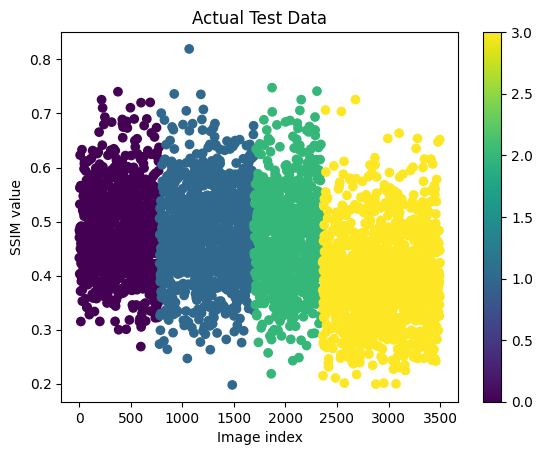

In [11]:
# from skimage.measure import compare_ssim
from skimage.metrics import structural_similarity, normalized_root_mse, mean_squared_error
import matplotlib.pyplot as plt

X_test = test_images / 255.0
N = len(X_test)
reconstructed_imgs = autoencoder.predict(X_test)
ssim_vals = []
for i in range(N):
    ssim_vals.append(structural_similarity(X_test[i].reshape((88, 88)), reconstructed_imgs[i].reshape((88, 88))))

tuple_list = list(zip(ssim_vals, test_class_list))
tuple_df = pd.DataFrame(tuple_list, columns=['SSIM Values', 'Class'])

#Group the dataframe by the 'Class' column and calculate the mean of the 'ssim values' column for each group
mean_ssim = tuple_df.groupby('Class')['SSIM Values'].mean()
print(mean_ssim)
print(tuple_df.groupby('Class')['SSIM Values'].var())

plt.scatter(range(N), ssim_vals, c=test_class_list, cmap='viridis')
plt.colorbar()
plt.xlabel('Image index')
plt.ylabel('SSIM value')
plt.title('Actual Test Data')
# plt.legend(['0', '1', '2', '3'])
plt.show()

3501
[1 1 1 ... 2 2 2]


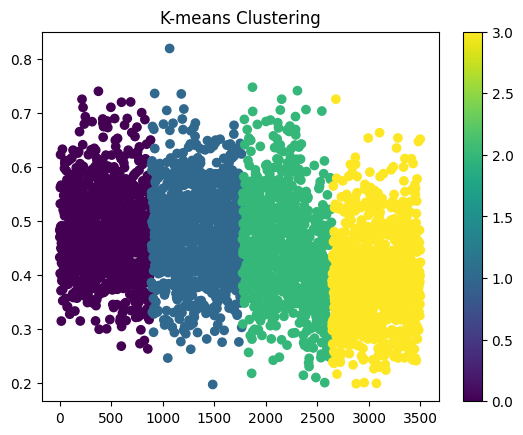

K-means homogeneity score: 0.761421


In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import homogeneity_score

n_clusters = 4

k_means = KMeans(n_clusters=n_clusters, init='random', n_init=1, random_state=0)
data = [[i, j] for i, j in zip(range(N), ssim_vals)]

def switch(x):
  if x == 1:
    return 0
  elif x == 0:
    return 1
  elif x == 2:
    return 3
  else:
    return 2

k_means.fit(data)
clusters = k_means.labels_
final_clusters = [switch(i) for i in clusters]
print(len(clusters))
print(clusters)
plt.scatter(range(N), ssim_vals, c=final_clusters, cmap='viridis')
plt.colorbar()
plt.title('K-means Clustering')
plt.show()

kmeans_homog = homogeneity_score(test_class_list, final_clusters)
print('K-means homogeneity score: %f' % kmeans_homog)

In [13]:
from sklearn.metrics import accuracy_score
print('Clustering Accuracy: ',accuracy_score(test_class_list,final_clusters))

Clustering Accuracy:  0.8663239074550129
